In [24]:
import numpy as np
from Simulation import simulate
from Models import diffusion_advection
from matplotlib import pyplot as plt

In [25]:
# Generate posterior csvs or read them in in the following cell
posterior = np.genfromtxt('log_adaptive_added_10.csv',delimiter=',',skip_header=1)
Cell_Count_U = 4e8
Cell_Count_L = 6.25e9
inits = np.array([Cell_Count_U, 0, 0, 1.3e3, Cell_Count_L, 0, 0, 0, 0])
ts = np.linspace(0,10,1001)
posterior_predictive = np.zeros((1000,1001))
peak_height = np.zeros(1000)

for i in range(len(posterior)):
    theta = posterior[i]
    p = [theta[0], theta[1], 4, 2, 5.2, theta[2], theta[3], theta[4], 20, 0.56*2.8e-6 / 7, 0.27 / 7, theta[5], theta[6]]
    results = simulate.solve_model(diffusion_advection.model, inits, ts, (p,))
    posterior_predictive[i,:] = results[:,3]
    peak_height[i] = ts[np.argmax(results[:,3])]

np.savetxt('Results/post_predictive_final.csv',posterior_predictive,delimiter=',')
np.savetxt('Results/peak_time_final.csv',peak_height,delimiter=',')

In [26]:
posterior = np.genfromtxt('Results/post_predictive_final.csv',delimiter=',')
peak_height = np.genfromtxt('Results/peak_time_final.csv',delimiter=',')
theta = [3.02707135e-07,9.58567813e-04, 5.88332021e-01, 7.70605939e-02, 1.16370064e-02, 2.15406375e-01, 1.95286359e-02]
Cell_Count_U = 4e8
Cell_Count_L = 6.25e9
ts = np.linspace(0, 10, 1001)
inits = np.array([Cell_Count_U, 0, 0, 1.3e3, Cell_Count_L, 0, 0, 0, 0])
p = [theta[0], theta[1], 4, 2, 5.2, theta[2], theta[3], theta[4], 20, 0.56*2.8e-6 / 7, 0.27 / 7, theta[5], theta[6]]
results = simulate.solve_model(diffusion_advection.model, inits, ts, (p,))

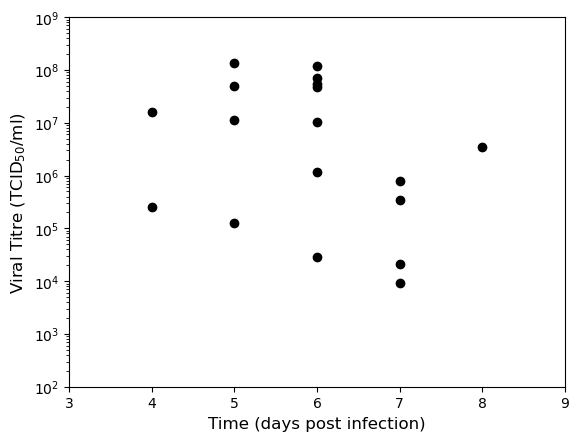

In [4]:
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,8.14,7.68,7.85,7.73,7.01,6.073,4.45,8.08,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.scatter(data_days, data,color='k')
ax.set_xlim((3,9))
ax.set_yscale('log')
ax.set_ylim((10**2,10**9))
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/dataset_added.pdf",dpi=2400,bbox_inches='tight')
plt.show()

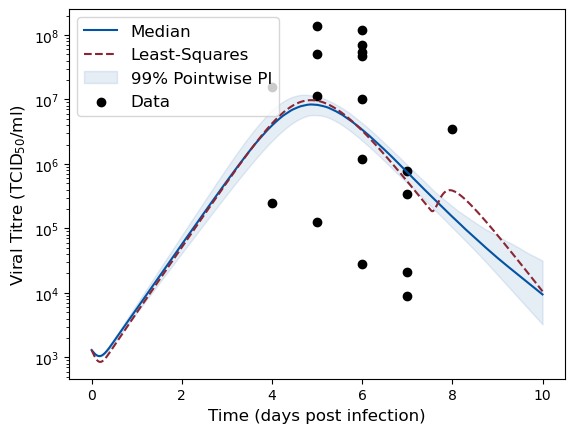

In [28]:
ci_u = np.percentile(posterior,axis=0,q=97.5)
ci_l = np.percentile(posterior,axis=0,q=0.025)
med = np.percentile(posterior,axis=0,q=50)
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,8.14,7.68,7.85,7.73,7.01,6.073,4.45,8.08,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.semilogy(ts,med,label="Median",color='#0353A4')
ax.semilogy(ts,results[:,3],label="Least-Squares",linestyle='--',color='#8B2635')
ax.fill_between(ts, (ci_l), (ci_u), color='#0353A4', alpha=.1,label="99% Pointwise PI")
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/VU_posterior_final.pdf",dpi=2400,bbox_inches='tight')
plt.show()

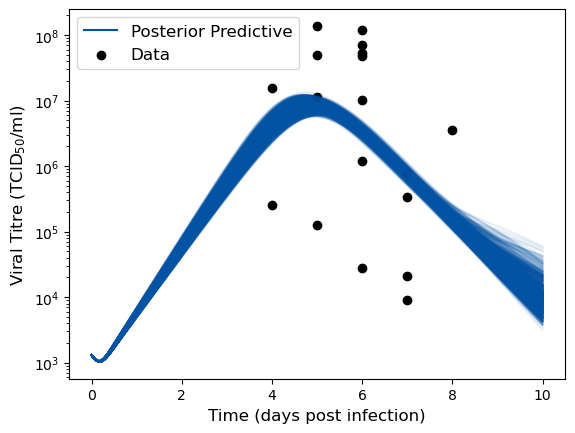

In [6]:
data = 10**np.array([7.2,5.40,5.1,7.05,7.7,8.14,7.68,7.85,7.73,7.01,6.073,4.45,8.08,5.894,5.5356,4.325,3.959,6.548])
data_days = [4,4,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,8]
fig, ax = plt.subplots()
ax.semilogy(ts,posterior[0,:],label="Posterior Predictive",color='#0353A4')
for i in range(1,1000):
    ax.semilogy(ts,posterior[i,:],alpha=0.1,color='#0353A4')
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/VU_posterior_final_trajectories.pdf",dpi=2400,bbox_inches='tight')
plt.show()

In [10]:
dies = np.genfromtxt('Results/Deaths_final.csv')
dies = np.array([bool(i) for i in dies])
survive = dies == 0
posterior_survive = posterior[survive]
posterior_die = posterior[dies]

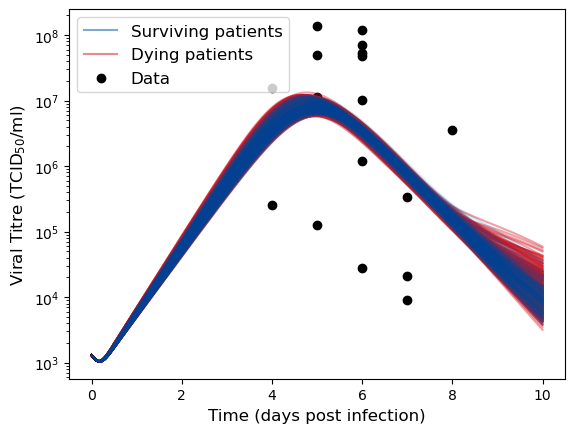

In [20]:
fig, ax = plt.subplots()
ax.semilogy(ts, posterior_survive[0],color='#0353A4',alpha=0.5,label='Surviving patients')
ax.semilogy(ts, posterior_die[0],color='#D51623',alpha=0.5,label='Dying patients')
for post in posterior_die:
    ax.semilogy(ts, post,color='#D51623',alpha=0.4)
for post in posterior_survive:
    ax.semilogy(ts, post,color='#0353A4',alpha=0.05)
ax.scatter(data_days, data,color='k',label="Data")
ax.legend(fontsize=12)
ax.set_xlabel("Time (days post infection)",fontsize=12)
ax.set_ylabel(r"Viral Titre (TCID$_{50}$/ml)",fontsize=12)
plt.savefig("Plots/VU_posterior_final_survival.pdf",dpi=2400,bbox_inches='tight')
plt.show()

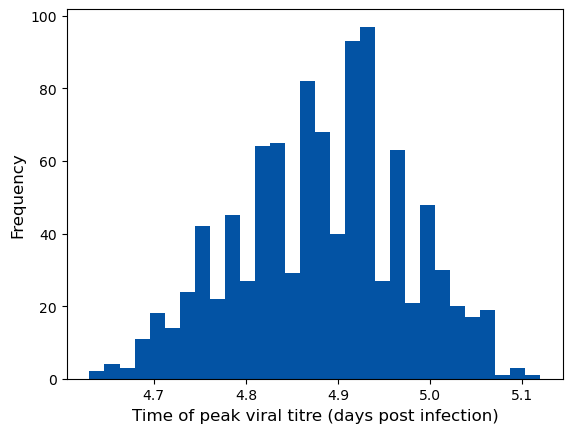

In [23]:
fig, ax = plt.subplots()
ax.hist(peak_height,bins=30,color="#0353A4")
ax.set_xlabel("Time of peak viral titre (days post infection)",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
plt.savefig("Plots/peak_time_posterior_final.pdf",dpi=2400,bbox_inches='tight')
plt.show()